The following notebook contains the code for the post-processing of the data using PyFluent Visualization for Pressure driven flows in the duct

In [132]:
import ansys.fluent.core as pyfluent

from ansys.fluent.visualization import set_config
from ansys.fluent.visualization.matplotlib import Plots
from ansys.fluent.visualization.pyvista import Graphics

set_config(blocking = True, set_view_on_display = "isometric")
%matplotlib notebook

Starting the solver_session

In [133]:
solver_session = pyfluent.launch_fluent (precision = "double", processor_count = 4, mode = "solver", show_gui = True)

pyfluent.launcher WARNING: PyFluent Watchdog did not initialize correctly, proceeding without it...


Reading the case file generated by the fluent solver

In [134]:
solver_session.file.read_case_data(file_name = "Project_3_PressureDrivenFlow_duct.cas.h5")

'*cx-overwrite-prompt?*'

Graphics object for the solver session from PyVista library

In [135]:
graphics = Graphics(solver_session)

Displaying mesh using the graphics object

In [136]:
mesh = graphics.Meshes["Mesh"]

In [137]:
mesh()

{'surfaces_list': None,
 'show_edges': False,
 'show_nodes': False,
 'show_faces': True}

In [138]:
mesh.surfaces_list = ["inlet", "outlet", "symmetry_upper", "wall_lower", "wall_right", "wall_left"]
mesh.show_edges = True

In [139]:
mesh()

{'surfaces_list': ['inlet',
  'outlet',
  'symmetry_upper',
  'wall_lower',
  'wall_right',
  'wall_left'],
 'show_edges': True,
 'show_nodes': False,
 'show_faces': True}

C:\Program Files\Python310\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (C:\Users\NOTEBOOK\AppData\Roaming\Python\Python310\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


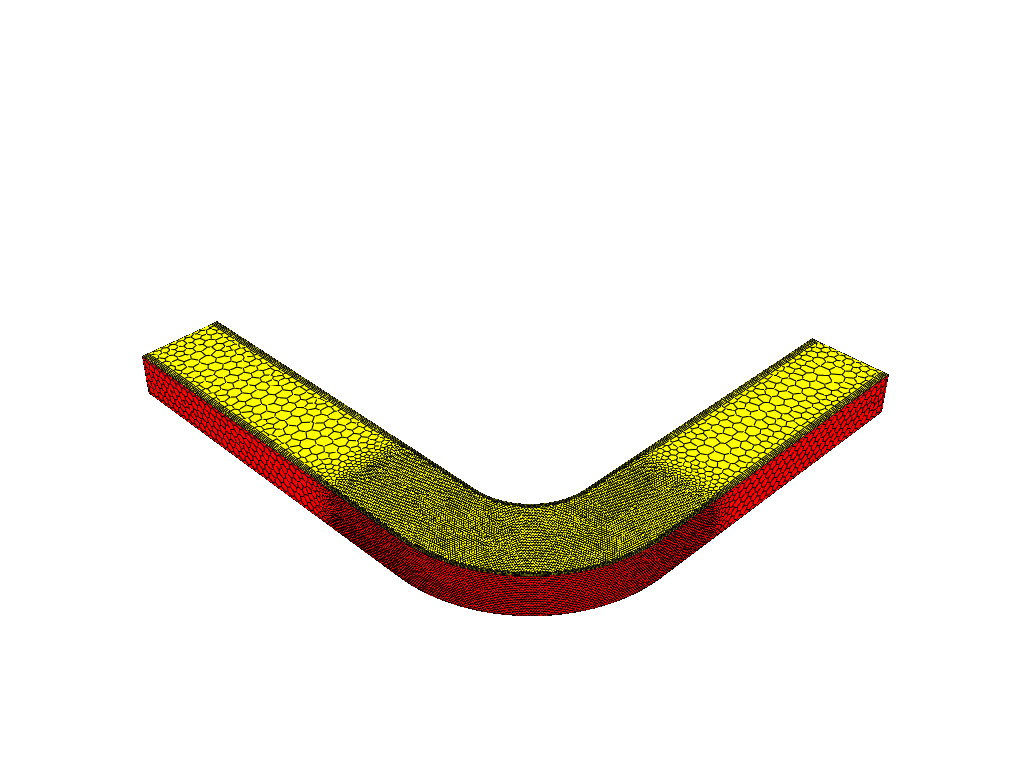

In [140]:
mesh.display()

Making a xy-plane at the middle section of the entire geometry

In [141]:
plane = graphics.Surfaces["xy-plane"]

In [142]:
plane()

{'show_edges': True,
 'definition': {'type': 'iso-surface',
  'iso_surface': {'field': None, 'rendering': 'mesh', 'iso_value': None}}}

In [143]:
plane.definition.type.allowed_values

['plane-surface', 'iso-surface']

In [144]:
plane.definition.type = "plane-surface"

In [145]:
plane()

{'show_edges': True,
 'definition': {'type': 'plane-surface',
  'plane_surface': {'creation_method': 'xy-plane', 'xy_plane': {'z': 0}}}}

In [146]:
plane.definition.plane_surface.xy_plane.z = -0.01

Displaying the Velocity-contour in xy plane

In [147]:
vel_cont = graphics.Contours["vel-contour"]

C:\Program Files\Python310\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (C:\Users\NOTEBOOK\AppData\Roaming\Python\Python310\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


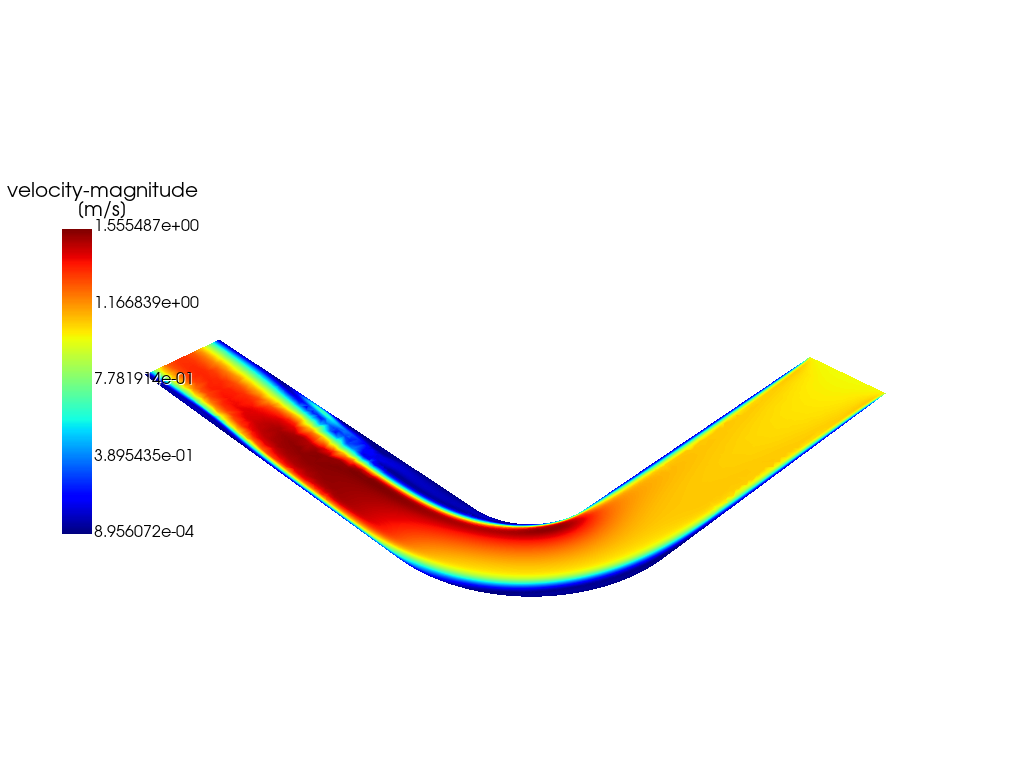

In [148]:
vel_cont.field = "velocity-magnitude"
vel_cont.surfaces_list = ["xy-plane"]
vel_cont.display()

Displaying the Pressure-contour in xy plane

C:\Program Files\Python310\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (C:\Users\NOTEBOOK\AppData\Roaming\Python\Python310\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


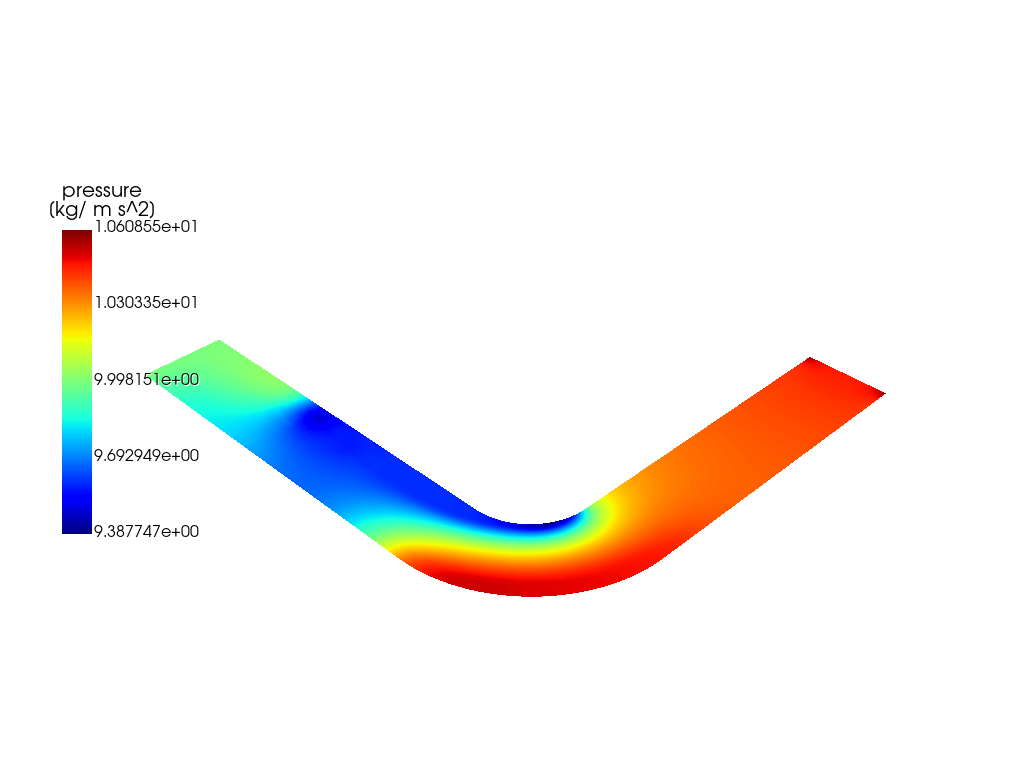

In [149]:
pressure_cont = graphics.Contours["pressure-contour"]
pressure_cont.field = "pressure"
pressure_cont.surfaces_list = ["xy-plane"]
pressure_cont.display()

Displaying the Velocity vector in xy plane

C:\Program Files\Python310\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (C:\Users\NOTEBOOK\AppData\Roaming\Python\Python310\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


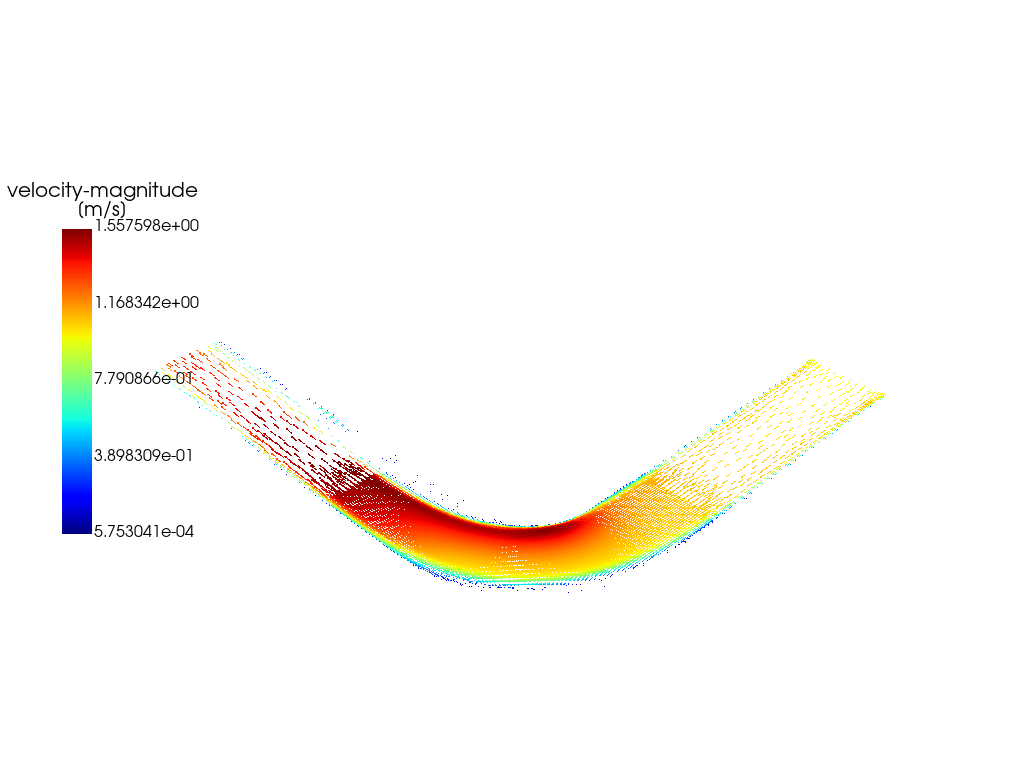

In [150]:
vector = graphics.Vectors["velocity-vector"]
vector.field = "velocity-magnitude"
vector.surfaces_list = ["xy-plane"]
vector.scale = 0.4
vector.display()

In [151]:
plane.definition.plane_surface.creation_method.allowed_values

['xy-plane', 'yz-plane', 'zx-plane']

Making a yz-plane at the curved section entry surface

In [152]:
plane_entry = graphics.Surfaces["yz-plane"]
plane_entry.definition.type = "plane-surface"
plane_entry()

{'show_edges': True,
 'definition': {'type': 'plane-surface',
  'plane_surface': {'creation_method': 'xy-plane', 'xy_plane': {'z': 0}}}}

In [153]:
plane_entry.definition.plane_surface.creation_method = "yz-plane"
plane_entry()

{'show_edges': True,
 'definition': {'type': 'plane-surface',
  'plane_surface': {'creation_method': 'yz-plane', 'yz_plane': {'x': 0}}}}

In [154]:
plane_entry.definition.plane_surface.yz_plane.x = 0.15

Displaying the Velocity-contour in yz plane

C:\Program Files\Python310\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (C:\Users\NOTEBOOK\AppData\Roaming\Python\Python310\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


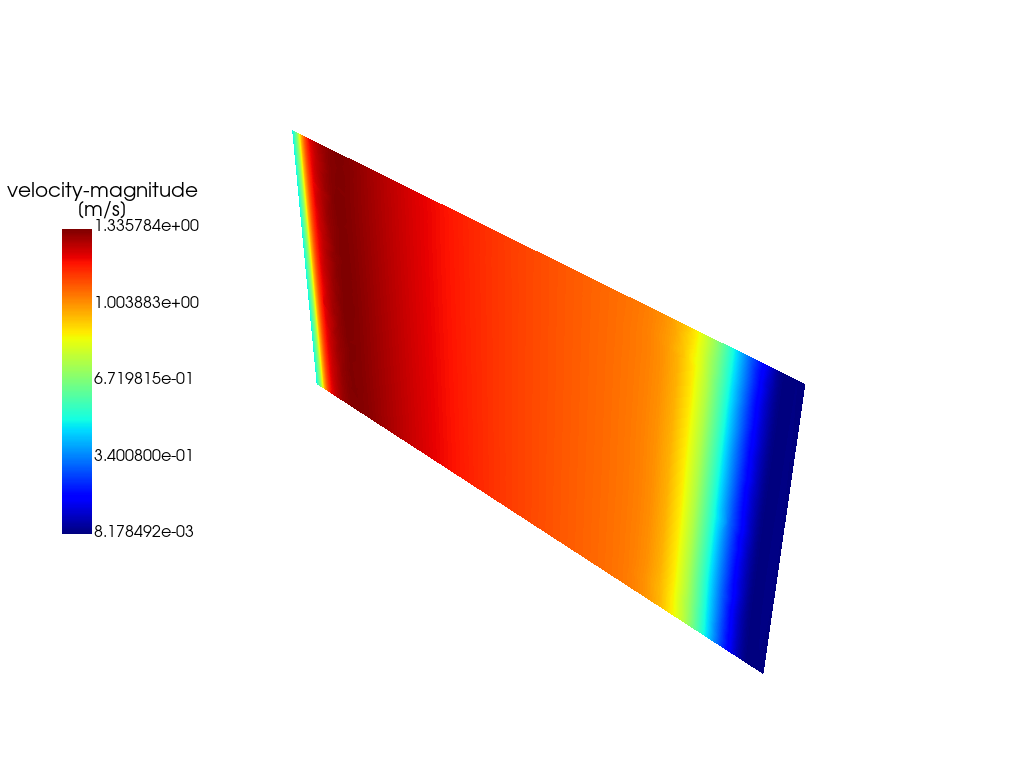

In [155]:
vel_cont_entry = graphics.Contours["contour1"]
vel_cont_entry.field = "velocity-magnitude"
vel_cont_entry.surfaces_list = ["yz-plane"]
vel_cont_entry.display()

Displaying the Velocity vector in yz plane

C:\Program Files\Python310\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (C:\Users\NOTEBOOK\AppData\Roaming\Python\Python310\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


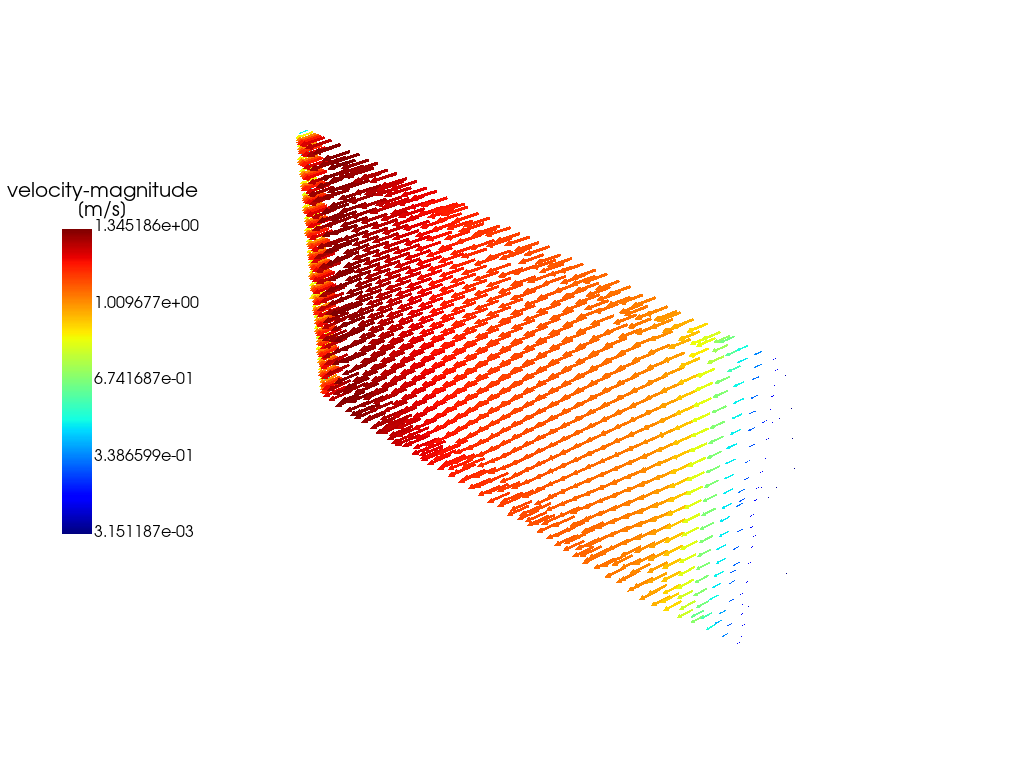

In [156]:
vector_entry = graphics.Vectors["velocity-vector-entry"]
vector_entry.field = "velocity-magnitude"
vector_entry.surfaces_list = ["yz-plane"]
vector_entry.scale = 0.2
vector_entry.display()

Displaying the Pressure-contour in yz plane

C:\Program Files\Python310\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (C:\Users\NOTEBOOK\AppData\Roaming\Python\Python310\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


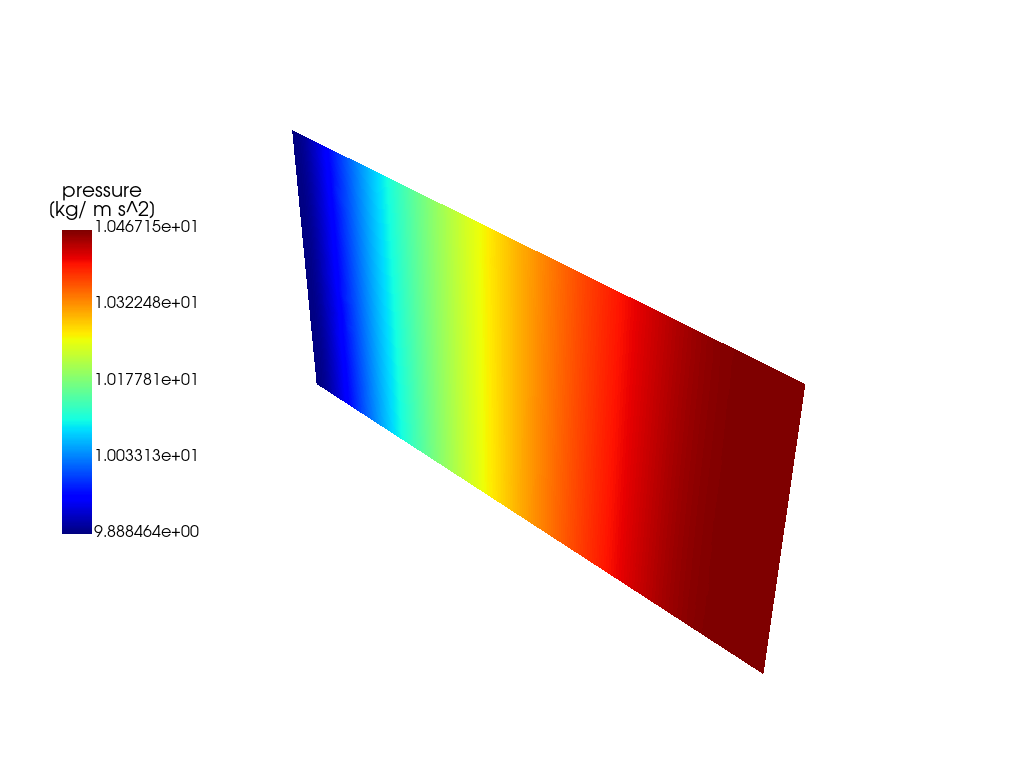

In [157]:
pressure_cont_entry = graphics.Contours["pressure-contour-entry"]
pressure_cont_entry.field = "pressure"
pressure_cont_entry.surfaces_list = ["yz-plane"]
pressure_cont_entry.display()

Making a zx-plane at the curved section exit surface

In [158]:
plane_exit = graphics.Surfaces["zx-plane"]
plane_exit.definition.type = "plane-surface"
plane_exit()

{'show_edges': True,
 'definition': {'type': 'plane-surface',
  'plane_surface': {'creation_method': 'xy-plane', 'xy_plane': {'z': 0}}}}

In [159]:
plane_exit.definition.plane_surface.creation_method = "zx-plane"
plane_exit()

{'show_edges': True,
 'definition': {'type': 'plane-surface',
  'plane_surface': {'creation_method': 'zx-plane', 'zx_plane': {'y': 0}}}}

In [161]:
plane_exit.definition.plane_surface.zx_plane.y = -0.05

Displaying the Velocity-contour in zx plane

C:\Program Files\Python310\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (C:\Users\NOTEBOOK\AppData\Roaming\Python\Python310\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


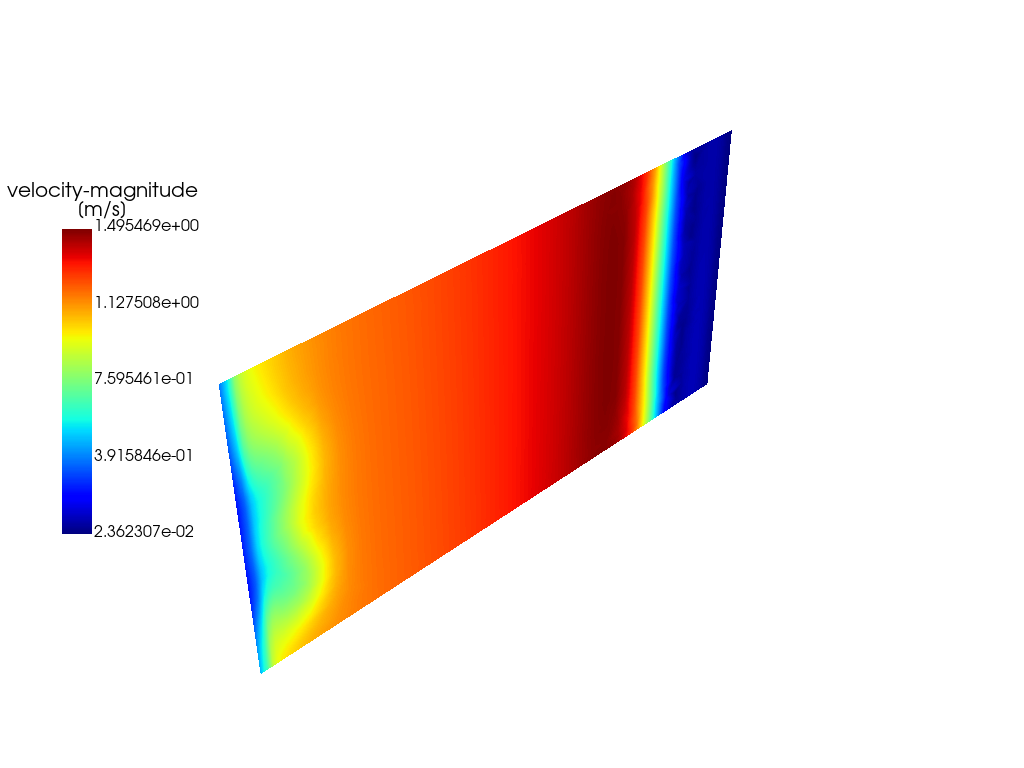

In [162]:
vel_cont_exit = graphics.Contours["contour2"]
vel_cont_exit.field = "velocity-magnitude"
vel_cont_exit.surfaces_list = ["zx-plane"]
vel_cont_exit.display()

Displaying the Velocity vector in zx plane

C:\Program Files\Python310\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (C:\Users\NOTEBOOK\AppData\Roaming\Python\Python310\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


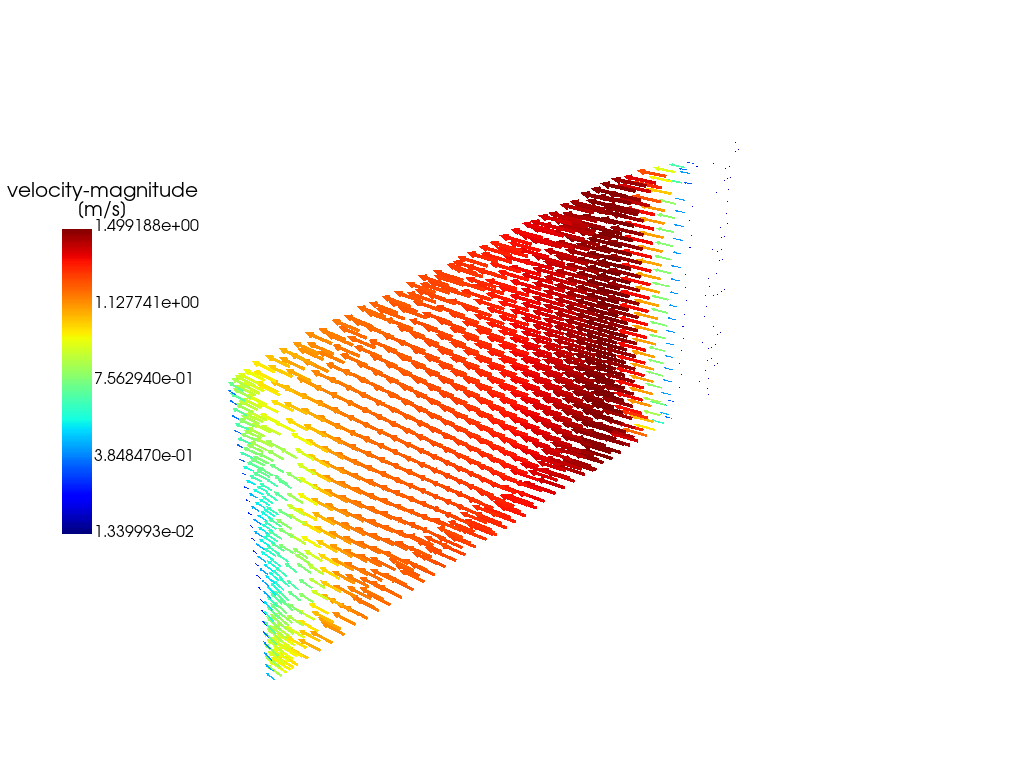

In [163]:
vector_exit = graphics.Vectors["velocity-vector-exit"]
vector_exit.field = "velocity-magnitude"
vector_exit.surfaces_list = ["zx-plane"]
vector_exit.scale = 0.2
vector_exit.display()

Displaying the Pressure-contour in zx plane

C:\Program Files\Python310\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (C:\Users\NOTEBOOK\AppData\Roaming\Python\Python310\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


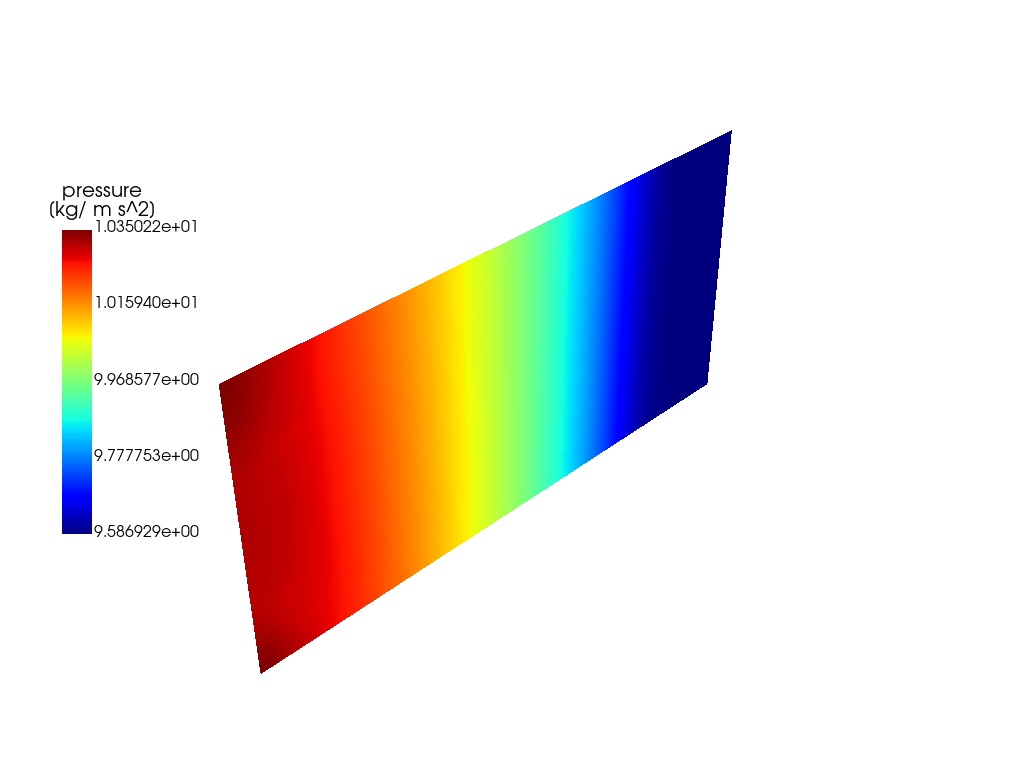

In [164]:
pressure_cont_exit = graphics.Contours["pressure-contour-exit"]
pressure_cont_exit.field = "pressure"
pressure_cont_exit.surfaces_list = ["zx-plane"]
pressure_cont_exit.display()